# Clustering
Grouping data on properties

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Clustering Libraries

In [4]:
#pip install kneed  #install this library from anaconda prompt as Admin
from kneed import KneeLocator 
from sklearn.datasets import make_blobs  #simulate data
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Sample Data

In [6]:
#simulated / synthentic data
features, true_labels = make_blobs( n_samples=200, centers=3, cluster_std=2.75, random_state=42)

In [7]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [8]:
features

array([[ 9.77075874e+00,  3.27621022e+00],
       [-9.71349666e+00,  1.12745180e+01],
       [-6.91330582e+00, -9.34755911e+00],
       [-1.08618591e+01, -1.07506350e+01],
       [-8.50038027e+00, -4.54370383e+00],
       [-4.82456978e+00, -5.20159136e+00],
       [-3.03819028e+00,  9.84354132e+00],
       [-8.17498253e+00, -6.24197227e+00],
       [ 3.91207254e+00,  9.45363489e+00],
       [-4.64425636e+00, -5.14863028e+00],
       [ 2.09082004e+00,  1.80947495e+00],
       [ 5.26539366e+00,  5.56781226e+00],
       [ 7.61826975e+00,  4.87112533e+00],
       [ 3.30512908e+00,  2.19832357e+00],
       [-9.29263277e-01,  2.48591905e+00],
       [-9.15936347e+00, -8.42060745e+00],
       [-2.70722546e+00,  1.17740016e+01],
       [-9.14073328e+00, -6.20996976e+00],
       [ 6.52709436e+00, -2.46179896e+00],
       [-2.51808095e+00, -1.02841022e+01],
       [ 1.04758084e+01,  4.81244915e+00],
       [ 3.33377923e+00,  1.76514294e-01],
       [-5.99215115e+00, -9.15499469e+00],
       [-2.

In [9]:
features.shape  # 200 rows of 2 columns data(act a properties)

(200, 2)

In [10]:
true_labels[:5]  #groups they belong

array([1, 0, 2, 2, 2])

### Scale Data

In [11]:
#need for scaling : height & weight are in different scales
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features[:5]  #values between -3 to +3

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

## Model
parameters for creating simulated data
n_samples - total samples to generate
centers - no of centers or clusters = 3
cluster_std - standard deviation
n_init - initial centers = 10
max_iter - number of iterations = 300
random_stat - select randomly seed value = 42

In [12]:
# Create Blank Model with hyperparameters
kmeans = KMeans( init = 'random', n_clusters=3, n_init=10, max_iter=300, random_state=42)
kmeans # model 

KMeans(init='random', n_clusters=3, random_state=42)

### Run Model with parameters

In [13]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

## Model Output

In [14]:
kmeans.inertia_  #error value

74.57960106819853

#### Cluster Centers

In [15]:
kmeans.cluster_centers_  #average or rep values

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [16]:
#no of iterations
kmeans.n_iter_  #in 2 times, clusters stabilised

2

In [17]:
# Label values / Cluster Groups
kmeans.labels_[:5]

array([2, 0, 1, 1, 1])

## Select Optimal No of Cluster

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


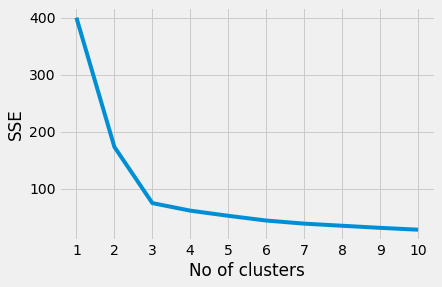

3

In [20]:
#%%choosing no of clusters graphically

kmeans_kwargs = {'init':'random', 'n_init':10, 'max_iter': 300, 
                 'random_state': 42}
sse=[]
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.style.use('fivethirtyeight')
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel('No of clusters')
plt.ylabel('SSE')
plt.show();

kl = KneeLocator(x=range(1,11), y=sse, curve='convex', direction='decreasing')
kl.elbow


In [ ]:
# Environment variables
# 'OMP_NUM_THREADS':1

In [ ]:
# end here

### Links
https://realpython.com/k-means-clustering-python/